<a href="https://colab.research.google.com/github/manojkhara/data-science-lab/blob/main/week-10/6%20make_data_stationary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Make data stationary

- differencing : $y_t - y_{t-1}$

- ["11/07/2025" ,"12/07/2025", "13/07/2025", "14/07/2025", "15/07/2025", "16/07/2025"]
- [4,2,1,2,3,5]
- [NA , -2,


In [ ]:
import pandas as pd

# Create sample time series data (unsorted)
data = {
    'Date': ['2020-03-01', '2020-01-01', '2020-02-01', '2020-01-13', '2020-01-16', '2020-01-16'],
    'Value': [300, 100, 200, 200, 300, 400]
}
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df.sort_index()
df

,Value
Date,
2020-01-01,100
2020-01-13,200
2020-01-16,300
2020-01-16,400
2020-02-01,200
2020-03-01,300


In [ ]:
df["Value"].diff()

,Value
Date,
2020-01-01,NaN
2020-01-13,100.0
2020-01-16,100.0
2020-01-16,100.0
2020-02-01,-200.0
2020-03-01,100.0


#import data

In [ ]:
# Load the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Using airline passenger dataset (monthly totals)
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<Axes: xlabel='Month'>

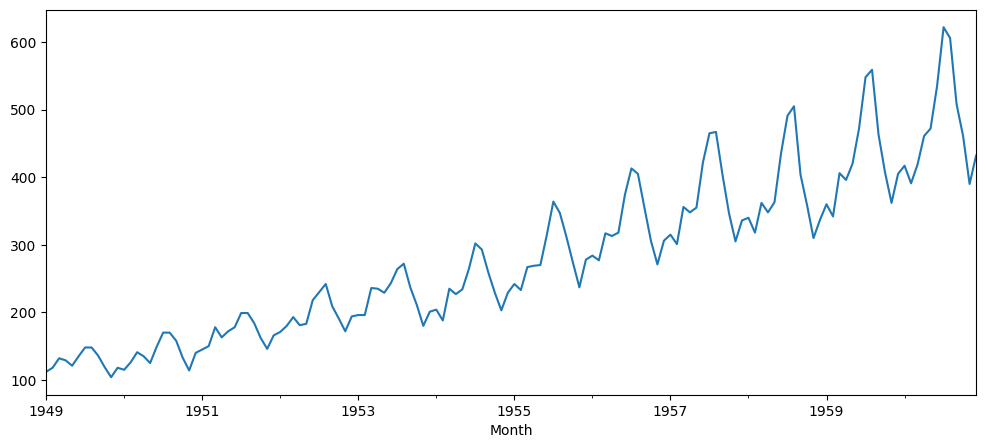

In [ ]:
df["Passengers"].plot(figsize = (12,5))

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss

In [ ]:
dftest = adfuller(df["Passengers"], autolag='AIC')

In [ ]:
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)'%key] = value
dfoutput

,0
Test Statistic,0.815369
p-value,0.991880
#Lags Used,13.000000
Number of Observations Used,130.000000
Critical Value (1%),-3.481682
Critical Value (5%),-2.884042
Critical Value (10%),-2.578770


In [ ]:
kpsstest = kpss(df["Passengers"], regression='ct', nlags="auto")

/tmp/ipython-input-4267114024.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(df["Passengers"], regression='ct')


In [ ]:
kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','#Lags Used'])
for key,value in kpsstest[3].items():
  kpss_output['Critical Value (%s)'%key] = value
kpss_output

,0
Test Statistic,0.09615
p-value,0.10000
#Lags Used,4.00000
Critical Value (10%),0.11900
Critical Value (5%),0.14600
Critical Value (2.5%),0.17600
Critical Value (1%),0.21600


- Case 3: ADF concludes non-stationary, and KPSS concludes stationary  The series is trend stationary. To make the series strictly stationary, we need to remove the trend in this case. Then we check the **detrended series** for stationarity.
- Case 4: ADF concludes stationary, and KPSS concludes non-stationary  The series is difference stationary. Differencing is to be used to make series stationary. Then we check the **differenced series** for stationarity.

# Differencing

In [ ]:
df["Passengers"]

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [ ]:
df["difference"] = df["Passengers"].diff()
df

,Passengers,difference
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0
...,...,...
1960-08-01,606,-16.0
1960-09-01,508,-98.0
1960-10-01,461,-47.0


y_t - y_{t-1} = 118 - 112 = 6

In [ ]:
difference = df["Passengers"].diff()
difference = difference.dropna()
difference

,Passengers
Month,
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
1949-06-01,14.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


In [ ]:
dftest = adfuller(difference, autolag='AIC')

In [ ]:
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)'%key] = value
dfoutput

,0
Test Statistic,-2.829267
p-value,0.054213
#Lags Used,12.000000
Number of Observations Used,130.000000
Critical Value (1%),-3.481682
Critical Value (5%),-2.884042
Critical Value (10%),-2.578770


In [ ]:
kpsstest = kpss(difference, regression='c', nlags="auto")

/tmp/ipython-input-3597463228.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(difference, regression='c', nlags="auto")


In [ ]:
kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','#Lags Used'])
for key,value in kpsstest[3].items():
  kpss_output['Critical Value (%s)'%key] = value
kpss_output

,0
Test Statistic,0.023898
p-value,0.100000
#Lags Used,7.000000
Critical Value (10%),0.347000
Critical Value (5%),0.463000
Critical Value (2.5%),0.574000
Critical Value (1%),0.739000


# Transformation

If my data is having low variance
- np.log
- np.sqrt
- boxcox transformation
   - $Y(λ) = \dfrac{Y^λ - 1}{λ} $ (when $ λ ≠ 0$)
   - $Y(λ) = log(Y)$ (when $λ = 0$)

At the core of the Box Cox transformation is an exponent, lambda (λ), which varies from -5 to 5. All values of λ are considered and the optimal value for your data is selected; The “optimal value” is the one which results in the best approximation of a normal distribution curve. The transformation of Y has the form:
This test only works for positive data

https://www.statisticshowto.com/probability-and-statistics/normal-distributions/box-cox-transformation/

In [ ]:
np.log(df["Passengers"])

,Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


In [ ]:
dftest = adfuller(np.sqrt(df["Passengers"]), autolag='AIC')

In [ ]:
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)'%key] = value
dfoutput

,0
Test Statistic,-0.345854
p-value,0.918754
#Lags Used,13.000000
Number of Observations Used,130.000000
Critical Value (1%),-3.481682
Critical Value (5%),-2.884042
Critical Value (10%),-2.578770


In [ ]:
from scipy import stats

In [ ]:
df["Passengers"][df["Passengers"]>0]

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [ ]:
box_cox_val, lamda = stats.boxcox(df["Passengers"][df["Passengers"]>0])

In [ ]:
lamda

np.float64(0.1480226858137178)

In [ ]:
dftest = adfuller(box_cox_val, autolag="AIC")

In [ ]:
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)'%key] = value
dfoutput

,0
Test Statistic,-1.326071
p-value,0.617162
#Lags Used,13.000000
Number of Observations Used,130.000000
Critical Value (1%),-3.481682
Critical Value (5%),-2.884042
Critical Value (10%),-2.578770


# Detrending



In [ ]:
np.arange(len(df)).reshape(-1,1)

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [ ]:
from sklearn.linear_model import LinearRegression
# Step 1: Fit linear regression (trend) using sklearn
X = np.arange(len(df)).reshape(-1, 1)       # Time as feature
y = df['Passengers'].values                     # Passenger values
model = LinearRegression().fit(X, y)
trend = model.predict(X)


In [ ]:
df['detrended'] = y - model.predict(X)

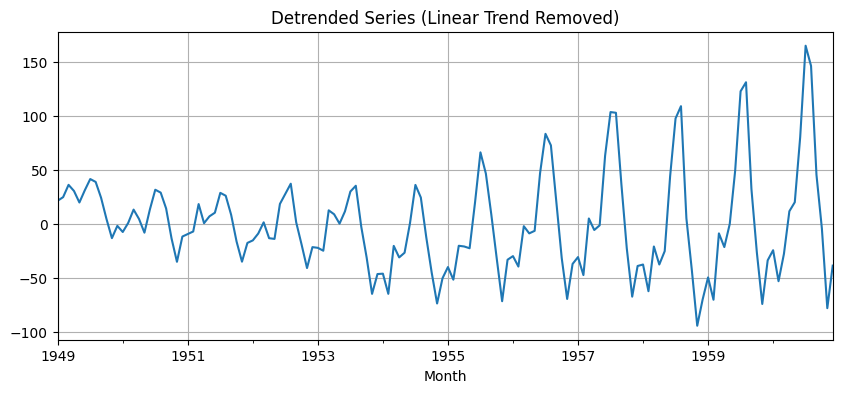

In [ ]:
# Plot detrended series
df['detrended'].plot(title='Detrended Series (Linear Trend Removed)', figsize=(10, 4))
plt.grid()
plt.show()


In [ ]:
# Step 2: Stationarity Tests
# ADF Test
adf_orig_p = adfuller(df['Passengers'])[1]
adf_det_p = adfuller(df['detrended'])[1]

# KPSS Test
kpss_orig_p = kpss(df['Passengers'], regression='ct')[1]     # trend + constant
kpss_det_p = kpss(df['detrended'], regression='c')[1]   # constant only

# Step 3: Print Results
print("📊 Stationarity Test Results")
print(f"ADF (Original):     p = {adf_orig_p:.4f} → {'Non-stationary' if adf_orig_p > 0.05 else 'Stationary'}")
print(f"KPSS (Original):    p = {kpss_orig_p:.4f} → {'Non-stationary' if kpss_orig_p < 0.05 else 'Stationary'}")
print(f"ADF (Detrended):    p = {adf_det_p:.4f} → {'Non-stationary' if adf_det_p > 0.05 else 'Stationary'}")
print(f"KPSS (Detrended):   p = {kpss_det_p:.4f} → {'Non-stationary' if kpss_det_p < 0.05 else 'Stationary'}")


📊 Stationarity Test Results
ADF (Original):     p = 0.9919 → Non-stationary
KPSS (Original):    p = 0.1000 → Stationary
ADF (Detrended):    p = 0.2437 → Non-stationary
KPSS (Detrended):   p = 0.1000 → Stationary


/tmp/ipython-input-1640147344.py:7: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_orig_p = kpss(df['Passengers'], regression='ct')[1]     # trend + constant
/tmp/ipython-input-1640147344.py:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_det_p = kpss(df['detrended'], regression='c')[1]   # constant only


In [ ]:
detrended_ma = df['Passengers'] - df['Passengers'].rolling(window = 10).mean()
detrended_ma = detrended_ma.dropna()